In [1]:

from WebScraping.Twitter.SeleniumScrap import TwitterScraper
import os
from dotenv import load_dotenv

#-------------------------------------------MAIN----------------------------------------------------
load_dotenv()
# Récupérer les variables d'environnement
email=os.getenv("EMAIL_ADDRESS")
phone=os.getenv("PHONE_NUMBER")
password=os.getenv("PASSWORD")

word = "climate change"
languages = ["fr", "es"] 

# Créer une instance de TwitterScraper et utiliser les fonctions de la classe
scraper = TwitterScraper(email, password, phone)
scraper.getComments(word,'en')
# dataframe_foodwaste = scraper.process_with_word(word, languages)
# dataframe_climate = scraper.process_with_word("climate change", languages)

#---------------------------------------------------------------------------------------------------------------


Clicking on tweet container with text: Greenpeace co-founder, Dr. Patrick Moore: "I am firmly of the belief that the future will show that this whole hysteria over climate change was a complete fabrication."
['1,2 M', '330', '12 k', '34 k', '3 k']
1200000
Response text: Greenpeace co-founder, Dr. Patrick Moore: "I am firmly of the belief that the future will show that this whole hysteria over climate change was a complete fabrication."
Response element not found
['1,2 M', '330', '12 k', '34 k', '3 k']
Response text: CO2 is plant food, not "pollution". Retweet if you agree!

Available here: https://wideawake.clothing/collections/climate-change-t-shirts?page=1&sort_by=best-selling…

Use discount code TWITTER15 for 15% off your order!
Response element not found
['13', '131', '336', '20 k']
Response text: It's called whether.  SMH.
Response element not found
['5', '34', '105', '7 k']
Response text: It started looong ago…
Response element not found
['3', '10', '24', '5 k']
Response text: It

In [1]:
print(dataframe_climate.head(),dataframe_climate.tail())

NameError: name 'dataframe_climate' is not defined

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\theoh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Translated stop words for fr: {'https', 'youtube', 'gaspillage', 'nourriture', 'climate', 'photo', 'modifier', 'com', 'twitter', 'Climat', 'changementclimatique', 'amp', 'http', 'statut', 'Déchets alimentaires', 'www', 'co'}
Translated stop words for es: {'https', 'y', 'youtube', 'revolucionario', 'imagen', 'co', 'climatechange', 'estado', 'com', 'desperdicio de alimentos', 'http', 'clima', 'de alimentos', 'Twitter', 'comida', 'www', 'CLIMAT.'}
Translated stop words for de: {'https', 'Abfall', 'klimawandel', 'Com', 'Essen', 'Foto', 'CO', 'lebensmittelabfälle', 'Klima', 'amp', 'Status', 'Änderung, ändern', 'http', 'Twitter', 'klima', 'www', 'YouTube'}


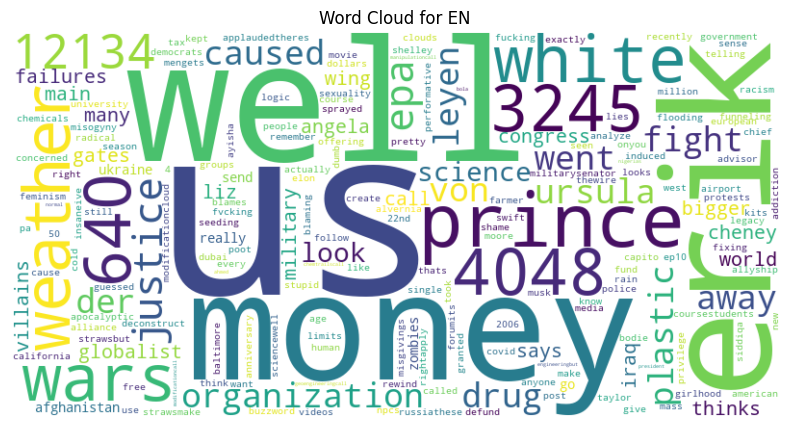

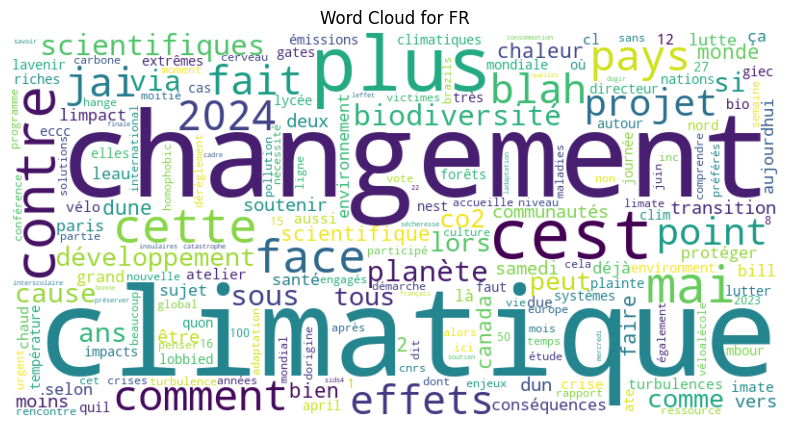

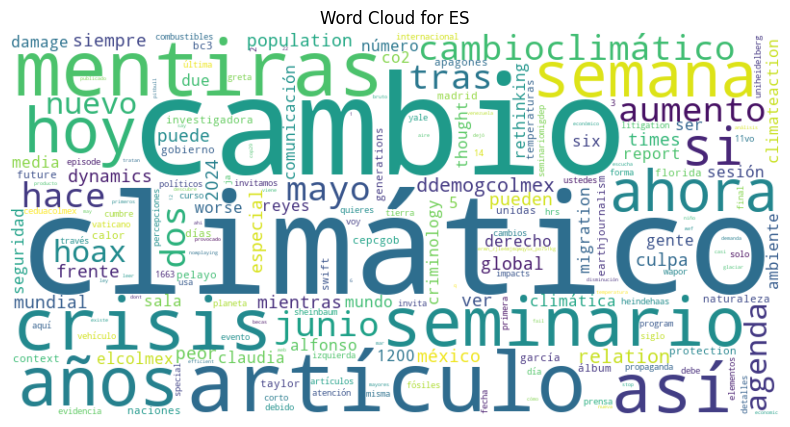

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [5]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from translate import Translator

# Téléchargement des mots vides pour la première exécution
nltk.download('stopwords')

def clean_word(word):
    """Nettoyer les mots en retirant la ponctuation."""
    return re.sub(r'[^\w\s]', '', word).lower()

# Charger les mots vides pour le français, l'espagnol et l'anglais
stop_words_fr = set(stopwords.words('french'))
stop_words_es = set(stopwords.words('spanish'))
stop_words_en = set(stopwords.words('english'))

# Mots vides personnalisés
stop_words_personal = 'food waste climate change climat climatechange https http com www twitter pic status co amp www youtube foodwaste'
stop_words_personal_set = set(stop_words_personal.split())

languages = ['fr', 'es', 'de']  # Ajoutez d'autres codes de langue au besoin

# Traduire les mots vides personnalisés pour chaque langue
translated_stop_words = {}

for language in languages:
    translated_words = []
    for word in stop_words_personal.split():
        translator = Translator(to_lang=language)
        translated_word = translator.translate(word)
        translated_words.append(translated_word)
        
    translated_stop_words[language] = set(translated_words)
    print(f"Translated stop words for {language}: {translated_stop_words[language]}")

# Fusionner tous les ensembles de mots vides pour obtenir un ensemble unique
stop_words = stop_words_personal_set.union(stop_words_fr).union(stop_words_es).union(stop_words_en)
for lang_translated_stop_words in translated_stop_words.values():
    stop_words = stop_words.union(lang_translated_stop_words)

# Dictionnaire pour stocker la fréquence des mots pour chaque langue
word_freq = {'en': {}}  # Dictionnaire pour l'anglais
word_freq.update({lang: {} for lang in languages})  # Ajoutez des dictionnaires vides pour chaque langue

# Boucle sur chaque tweet pour calculer la fréquence des mots
for index, row in dataframe_climate.iterrows():
    tweet = row['tweet']
    language = row['language']
    words = tweet.split()
    for word in words:
        word = clean_word(word)
        if word not in stop_words and word != '':
            word_freq[language][word] = word_freq[language].get(word, 0) + 1

# Créer des nuages de mots pour chaque langue
for language in word_freq:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq[language])
    plt.figure(figsize=(10, 5))
    plt.title(f"Word Cloud for {language.upper()}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
